In [13]:
from ipyleaflet import Map, basemaps, GeoJSON, LegendControl
from shapely.geometry import shape, GeometryCollection
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot
from splot.esda import lisa_cluster
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
from esda.moran import Moran
import geopandas as gpd
import scipy.stats
import shapely
import geojson

In [2]:
dep = geojson.load(open("./infosParDep.geojson"))

In [3]:
palette3 = ["#ede59a", "#BCE784", "#5DD39E", "#348AA7", "#525174"]

### Visualiser sur une carte le pourcentage d'utilisateurs qui twittent à propos d'écologie pour une année y

In [4]:
y = "2018"

center = [46.494739, 3]
zoom = 5

m=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)

for d in dep.features : 
    
    res = d["properties"]["percent_userEcol_"+y]
    coordinates = shape(d["geometry"]).buffer(0)
    
    if res>=10:
        color = "#5f2556"
    else : 
        ind = int(res/2)
        color = palette3[ind]
        
    m.add_layer(GeoJSON(data=d["geometry"], style={'color':color, 'fillOpacity': 0.8, 'weight':1, 'fillColor':color, 'opacity':0.8}))

m.layout.width = '50%'

legend = LegendControl({"0% à 2%":"#efe9ac", "2% à 4%":"#c8ea9a", "4% à 6%":"#7cdaaf", "6% à 8%":"#5ba0b6", "8% à 10%":"#73728d", "plus de 10%":"#7e4f75"}, name="", position="topright")

m.add_control(legend)

m

Map(center=[46.494739, 3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

### Visualiser sur une carte le pourcentage de voix obtenu par EELV aux élections de l'année y

In [5]:
y = "2019"

center = [46.494739, 3]
zoom = 5

m=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)

for d in dep.features : 
    
    res = d["properties"]["res_"+y]
    coordinates = shape(d["geometry"]).buffer(0)
    
    if res>=20:
        color = "#5f2556"
    else : 
        ind = int(res/4)
        color = palette3[ind]
        
    m.add_layer(GeoJSON(data=d["geometry"], style={'color':color, 'fillOpacity': 0.8, 'weight':1, 'fillColor':color, 'opacity':0.8}))

m.layout.width = '50%'

legend = LegendControl({"0% à 4%":"#efe9ac", "4% à 8%":"#c8ea9a", "8% à 12%":"#7cdaaf", "12% à 16%":"#5ba0b6", "16% à 20%":"#73728d", "plus de 20%":"#7e4f75"}, name="", position="topright")

m.add_control(legend)

m

Map(center=[46.494739, 3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

### calculer le coefficient de corrélation de Pearson

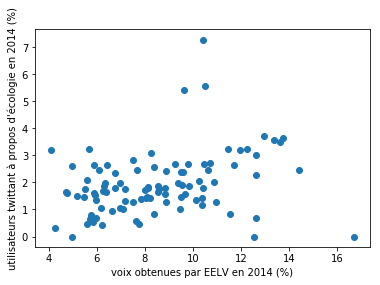

pearson, p-value :  (0.2936987798367182, 0.003680839155993707)


In [6]:
x=[]
y=[]
for d in dep.features : 
    percent_userEcol = d["properties"]["percent_userEcol_2014"]
    percent_elec = d["properties"]["res_2014"]
    x.append(percent_elec)
    y.append(percent_userEcol)
plt.scatter(x=x, y=y)
plt.ylabel("utilisateurs twittant à propos d'écologie en 2014 (%)")
plt.xlabel("voix obtenues par EELV en 2014 (%)")
plt.show()
print("pearson, p-value : ", scipy.stats.pearsonr(x, y))

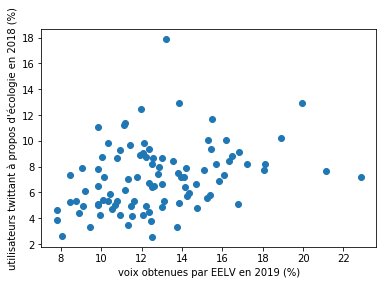

pearson, p-value :  (0.3199103329300078, 0.0014862959041306056)


In [7]:
x=[]
y=[]
for d in dep.features : 
    percent_userEcol = d["properties"]["percent_userEcol_2018"]
    percent_elec = d["properties"]["res_2019"]
    x.append(percent_elec)
    y.append(percent_userEcol)
plt.scatter(x=x, y=y)
plt.ylabel("utilisateurs twittant à propos d'écologie en 2018 (%)")
plt.xlabel("voix obtenues par EELV en 2019 (%)")
plt.show()
print("pearson, p-value : ", scipy.stats.pearsonr(x, y))

In [8]:
dep_gpd = gpd.read_file("./infosParDep.geojson")

### autocorrélation globale
exemple pour le pourcentage de voix obtenu par EELV en 2019

In [9]:
y = dep_gpd['res_2019'].values
w = Queen.from_dataframe(dep_gpd)
w.transform = 'r'

/usr/local/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


Indice de Moran pour l'autocorrélation globale

In [10]:
moran = Moran(y, w)
moran.I

0.5793493918157523

Diagramme de Moran

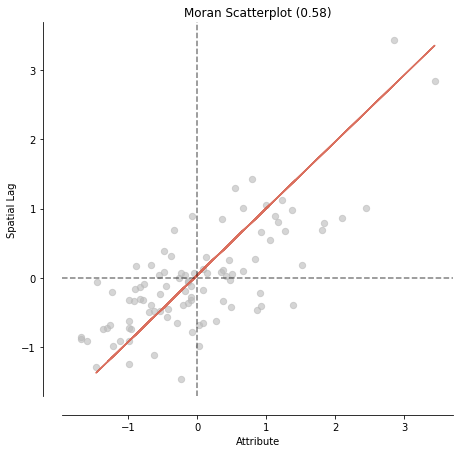

In [11]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

### autocorrélation locale
exemple pour le pourcentage de voix obtenu par EELV en 2019

In [12]:
moran_loc = Moran_Local(y, w)

répartition en fonction du type d'autocorrélation

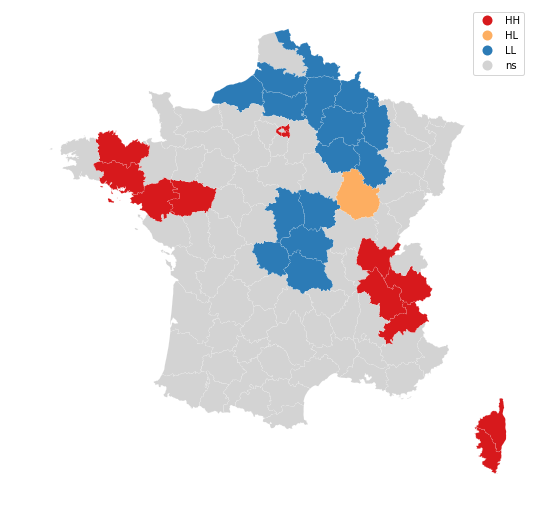

In [16]:
lisa_cluster(moran_loc, dep_gpd, p=0.05, figsize = (9,9))
plt.axis("auto")
plt.show()